<a href="https://colab.research.google.com/github/lostapple9/Evil_Genius/blob/main/EG_software_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from typing import List
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
class ProcessGameState:
    def __init__(self, file_path:str):
        # Initialize the class by reading game data from a Parquet file
        self.game_data = pd.read_parquet(file_path, engine='pyarrow')
        self.file_path = file_path

    def load_data(self):
        # Return the loaded game data
        return self.game_data

    def get_columns(self, column:List):
        # Retrieve specific columns from the game data
        return self.game_data[column]

    def download_data(self, data):
        # Save the provided data as a new Parquet file
        data.to_parquet('newFile.parquet')

    def is_within_boundary(self, boundary):
        # Check if game data points are within a specified boundary
        x_list, y_list = [], []
        for i in range(len(boundary)):
            x_list.append(boundary[i][0])
            y_list.append(boundary[i][1])

        # Calculate the minimum and maximum values for x and y
        x_min = np.min(x_list)
        x_max = np.max(x_list)
        y_min = np.min(y_list)
        y_max = np.max(y_list)

        # Create a new column 'within boundary' with default value False
        self.game_data["within boundary"] = [False]*len(self.game_data)

        # Select data points that fall within the specified boundary
        df2 = self.game_data.loc[(self.game_data['x'] >= x_min) & (self.game_data['x'] <= x_max) & (self.game_data['y'] >= y_min) & (self.game_data['y'] <= y_max)]
        df2['within boundary'] = df2['within boundary'].replace(False, True)

        # Select data points that fall outside the specified boundary
        df3 = self.game_data.loc[(self.game_data['x'] < x_min) | (self.game_data['x'] > x_max) | (self.game_data['y'] < y_min) | (self.game_data['y'] > y_max)]

        # Return two data frames: points within and outside the boundary
        return df2, df3

    def extract_weapon_classes(self):
        # Extract unique weapon classes from the game data
        weapon_classes = set()

        # Iterate over each row and check the inventory for weapon classes
        for index, row in self.game_data.iterrows():
            inv = row["inventory"]
            if inv is not None:
                for x in inv:
                    weapon_classes.add(x.get('weapon_class'))

        # Return the set of weapon classes
        return weapon_classes


In [7]:
# Specify the file path of the game state data Parquet file
file_path = '/content/game_state_frame_data.parquet'

# Create an instance of the ProcessGameState class, passing the file path
game = ProcessGameState(file_path)

# Load the game data using the load_data() method
game_data = game.load_data()

# Retrieve the first few rows of the loaded game data
game_data.head()


,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
0,1,2511,T,Team1,100,100,True,-1310,-3333,294,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
1,1,2527,T,Team1,100,100,True,-1303,-3322,294,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
2,1,2543,T,Team1,100,100,True,-1290,-3303,292,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
3,1,2559,T,Team1,100,100,True,-1275,-3280,290,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
4,1,2575,T,Team1,100,100,True,-1254,-3262,288,...,900,TSpawn,1,01:55,5,5,False,de_overpass,0.0,Player0


In [8]:
# Specify the boundary as a list of coordinate pairs
boundary = [[-1735, 250], [-2024, 398], [-2806, 742], [-2472, 1233], [-1565, 580]]

# Call the is_within_boundary() method on the game object, passing the boundary
# df2 is df that is within boundary and df3 is df that is not in the boundary
df2, df3 = game.is_within_boundary(boundary)


<ipython-input-6-95c625ec5bce>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['within boundary'] = df2['within boundary'].replace(False, True)


In [9]:
print('First 10 row of the df when x, y is within the boundray list:\n(within boundary column is at the end of the df)')
df2.head(10)

First 10 row of the df when x, y is within the boundray list:
(within boundary column is at the end of the df)


,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,within boundary
1792,3,46607,T,Team1,26,74,True,-2393,250,493,...,LowerPark,90,00:25,4,3,False,de_overpass,0.0,Player0,True
1793,3,46623,T,Team1,26,74,True,-2379,270,493,...,LowerPark,90,00:25,4,2,False,de_overpass,0.0,Player0,True
1794,3,46639,T,Team1,26,74,True,-2369,294,492,...,LowerPark,90,00:25,4,2,False,de_overpass,0.0,Player0,True
1795,3,46655,T,Team1,26,74,True,-2366,318,492,...,LowerPark,90,00:25,4,2,False,de_overpass,0.0,Player0,True
1796,3,46671,T,Team1,26,74,True,-2355,340,492,...,BombsiteA,91,00:25,4,2,False,de_overpass,0.0,Player0,True
1797,3,46687,T,Team1,26,74,True,-2339,360,490,...,BombsiteA,91,00:25,4,2,False,de_overpass,0.0,Player0,True
1798,3,46703,T,Team1,26,74,True,-2326,382,480,...,BombsiteA,91,00:25,4,2,False,de_overpass,0.0,Player0,True
1799,3,46719,T,Team1,26,74,True,-2315,407,480,...,BombsiteA,91,00:25,4,2,False,de_overpass,0.0,Player0,True
1800,3,46735,T,Team1,26,74,True,-2302,431,480,...,BombsiteA,91,00:24,4,2,False,de_overpass,0.0,Player0,True
1801,3,46751,T,Team1,26,74,True,-2289,454,480,...,BombsiteA,91,00:24,4,2,False,de_overpass,0.0,Player0,True


In [10]:
# Is entering via the light blue boundary a common strategy used by
# Team2 on T (terrorist) side?

# Select the DataFrame for Team2 on T side within the total data
df5 = game_data.loc[(game_data['team'] == 'Team2') & (game_data['side'] == 'T')]

# Select the DataFrame for Team2 on T side within the specified boundary
df6 = df2.loc[(game_data['team'] == 'Team2') & (game_data['side'] == 'T')]

# Calculate the percentage of occurrences of the boundary strategy
percent = len(df6.index) / len(df5.index) * 100
percent = round(percent, 2)

# Print the result
print(f"The chance of Team2 on T side via the light blue boundary is {percent}% of total vectors.")
if percent > 50:
    print("It is a common strategy.")
else:
    print("It is not a common strategy.")


The chance of Team2 on T side via the light blue boundary is 5.42% of total vectors.
It is not a common strategy.


In [11]:
# What is the average timer that Team2 on T (terrorist) side enters
# “BombsiteB” with least 2 rifles or SMGs?

# Select the DataFrame for Team2 on T side entering "BombsiteB" without the bomb being planted
two_b_df = df5.loc[(df5['area_name'] == 'BombsiteB') & (df5['bomb_planted'] == False)]

# Initialize a list to store the timer values
timer = []

# Iterate over each row in the DataFrame
for index, row in two_b_df.iterrows():
    inv = row["inventory"]
    if inv is not None:
        # Check if the inventory contains at least 2 rifles or SMGs
        count = 0
        for x in inv:
            if x.get('weapon_class') == 'Rifle' or x.get('weapon_class') == 'SMG':
                timer.append(row['clock_time'])

# Calculate the average timer in seconds
timer2 = []
for t in timer:
    timer2.append(sum(x * int(t) for x, t in zip([60, 1], t.split(":"))))
avg = sum(timer2) / len(timer)

# Convert the average timer to minutes and seconds
mins = int(avg) // 60
sec = int(avg) % 60

# Format the average time as a string
avg_time = f"{mins:02d}:{sec:02d}"

# Print the average timer
print(f"Average timer that Team2 on T side enters 'BombsiteB' with at least 2 rifles or SMGs:\n{avg_time}")


Average timer that Team2 on T side enters 'BombsiteB' with at least 2 rifles or SMGs:
01:19


,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,within boundary
67137,2,27186,CT,Team2,100,100,True,-1142,311,45,...,BombsiteB,9,01:46,5,5,False,de_overpass,0.0,Player5,False
67138,2,27202,CT,Team2,100,100,True,-1111,310,60,...,BombsiteB,9,01:46,5,5,False,de_overpass,0.0,Player5,False
67139,2,27218,CT,Team2,100,100,True,-1081,308,76,...,BombsiteB,10,01:46,5,5,False,de_overpass,0.0,Player5,False
67140,2,27234,CT,Team2,100,100,True,-1050,307,91,...,BombsiteB,10,01:46,5,5,False,de_overpass,0.0,Player5,False
67141,2,27250,CT,Team2,100,100,True,-1027,295,96,...,BombsiteB,10,01:46,5,5,False,de_overpass,0.0,Player5,False


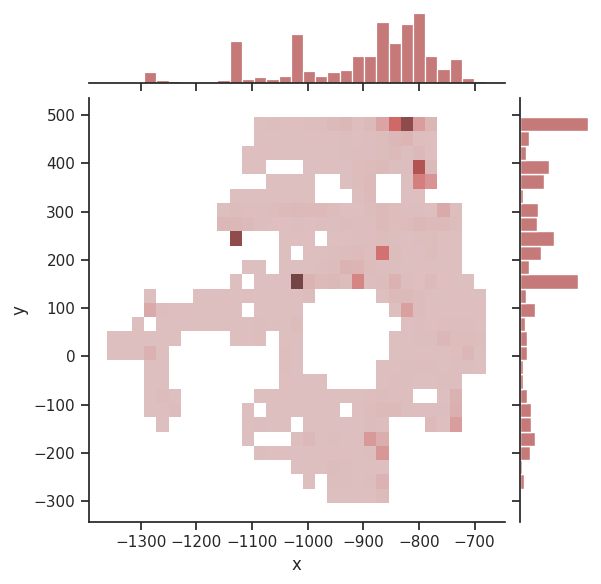

In [12]:
# Now that we’ve gathered data on Team2 T side, let's examine their CT
# (counter-terrorist) Side. Using the same data set, tell our coaching
# staff where you suspect them to be waiting inside “BombsiteB”


# Filter the DataFrame for Team2 on the CT side at "BombsiteB"
two_c_df = game_data.loc[(game_data['team'] == 'Team2') & (game_data['side'] == 'CT') & (game_data['area_name'] == 'BombsiteB')]

# Set the seaborn theme
sns.set_theme(style="ticks")

# Display the first few rows of the DataFrame
display(two_c_df.head())

# Create a joint histogram plot
sns.jointplot(x=two_c_df['x'], y=two_c_df['y'], kind="hist", color="#b34c4c")

# Show the plot
plt.show()
